In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

from hmmlearn import hmm
import sb_hmmlearn.hmm
# import time

# Generate Data
sb_hmm is designed to s of a hidden markov system with equilibrium transition matrix A0. The transition matrix is assumed to be perturbed from equilibrium by a matrix A1, and equilibriate over time such that 

$$A(t)=A_0+U_tA_1$$

The goal is to estimate $U_t$


First, use the hmmlearn package to generate synthetic data from data from an original transition matrix A0, and perturbed matrix (A0+A1). Have it recover in TWO distinct phases.

0.0 [1. 1. 1. 1. 1.]


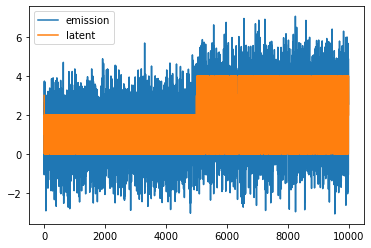

In [9]:
"""
Make reference HMM
"""

n_states = 5
d_em = 1

A0 = np.random.uniform(.1,.3,size=(n_states,n_states))+np.eye(n_states)
for i in range(n_states):
    A0[i] = A0[i]/A0[i].sum()
    
    
A1 = np.zeros(A0.shape)
mx=3
for i in range(n_states):
    A1[i,mx:] = -A0[i,mx:]
    A1[i,:mx] = np.sum(A0[i,mx:])/mx
print((A0+A1).min(),(A0+A1).sum(axis=1))

covars = [np.eye(d_em) for i in range(n_states)]
means = np.arange(n_states)
startprob = np.ones(n_states)/n_states

"""
Generate sampled trajectories
"""
hmm1 = hmm.GaussianHMM(n_components=n_states, covariance_type='full',
                 params="", init_params="",)

hmm1.transmat_ = A0+A1
hmm1.startprob_ = startprob
hmm1.means_ = means[:,None]
hmm1.covars_ =covars

hmm2 = hmm.GaussianHMM(n_components=n_states, covariance_type='full',
                 params="", init_params="",)

hmm2.transmat_ = A0
hmm2.startprob_ = startprob
hmm2.means_ = means[:,None]
hmm2.covars_ =covars
b_true = 5000
x1,z1 = hmm1.sample(b_true)
x2,z2 = hmm2.sample(b_true)

x = np.append(x1,x2)
z = np.append(z1,z2)
plt.plot(x, label='emission')
plt.plot(z, label='latent')
plt.legend()

# Fit the response
Now, use sb_hmmlearn fit() function to estimate the dynamics of the perturbation response in this sysnthetic data

In [17]:
a_0=10000 /(120*60*24)
b_0=1.8*b_true/(120*60*24)
grad_iter = 5
grad_conv = 1
grad_lr = np.logspace(-2,-8,7)
t0 = 0*24*60*120
n_iter=100
method = 'grad_ascent_linesearch'

new_hmm = sb_hmmlearn.hmm.GaussianHMM(n_components=n_states, covariance_type='full',
                 n_iter=n_iter, tol=10**-4, verbose=False,
                 params="", init_params="",
                  A1 = A1, 
                  a = a_0,
                  b = b_0,
                  grad_iter = grad_iter,
                  grad_conv = grad_conv,
                  grad_lr = grad_lr,
                  t0 = t0,
                  transmat_ = A0,
                  startprob_ = startprob,
                  means_ =means[:,None], #for subclass
                  covars_ = covars,
                  )

new_hmm.grad_method = method
new_hmm.fit(x[:,None])  ###FITS THE SIGMOID FUNCTION OF THE 
a_fit = new_hmm.a
b_fit = new_hmm.b


E iteration:  0
trans:  0.015910256628952492
log_trans:  -0.41166894602973464
trans:  0.015910256628952492
log_trans:  -0.41166894602973464
fwd:  [-23.73623913 -22.34375576 -21.51472026 -23.88780223 -24.59679303]
bwd:  [-18266.28036272 -18265.65590892 -18265.58940517 -18265.88204806
 -18265.97582186]
grad:  -1003.9051682852505 -3572.136234630454
a:  0.05516480811447454
b:  0.0424562915821269
grad:  -1978.4802303532356 -1851.7735855764854
a:  0.04786381967721343
b:  0.03562287604968782
grad:  -2787.1015469358695 -572.4739553723895
a:  0.03806831936298415
b:  0.03361086869534389
grad:  -3899.901703568521 -37.781504849798864
a:  0.028068788598221282
b:  0.0335139951460083
grad:  -5504.747042755218 -86.44668856779666
a:  0.01807002145229713
b:  0.03335697425062253
E iteration:  1
trans:  0.007504866242323709
log_trans:  -0.3985624793627341
trans:  0.007504866242323709
log_trans:  -0.3985624793627341
fwd:  [-23.83441481 -22.42644224 -21.57046012 -24.74543018 -25.4628345 ]
bwd:  [-17980.6853

grad:  -635.3836964763186 -967.490506300705
a:  0.001763101986832918
b:  0.029306359790492988
grad:  746.968172974086 242.36801782670088
a:  0.0017726138111000536
b:  0.029309446082622894
grad:  385.14250633349275 271.02360036907936
a:  0.001780791901354164
b:  0.029315200979650263
E iteration:  11
trans:  3.9029707937787705e-09
log_trans:  -0.3870036154383811
trans:  3.9029707937787705e-09
log_trans:  -0.3870036154383811
fwd:  [-23.88583192 -22.47215346 -21.59434669 -39.25174076 -39.97317062]
bwd:  [-17669.81099012 -17669.22111586 -17669.15209767 -17669.34554158
 -17669.36840671]
grad:  -7051.3538577035715 1139.2152563415948
a:  0.0016820719745299867
b:  0.029331150150407048
grad:  -3357.9136103263 -130.2036990867624
a:  0.00158214706558798
b:  0.02932727554424233
grad:  855.6733047680009 -1145.461322218577
a:  0.0015881317338627776
b:  0.02931926406837077
grad:  484.68163008886313 -882.5445011996559
a:  0.001592945446771508
b:  0.029310498900486905
grad:  163.75020699288325 -617.8159

/home/sam/anaconda3/envs/imgBehavior_shmm/lib/python3.7/site-packages/sb_hmmlearn/base.py:816: RuntimeWarning: divide by zero encountered in log
  L = lambda : (P_tij*np.log(self.transmat_ + np.transpose(self.A1[:,:,None]*self.U(t),[2,0,1]))).sum()


grad:  -6586.853420450549 799.8124059178174
a:  0.0014962366078279474
b:  0.02931288668264845
grad:  -2415.337464970543 -582.3777486439863
a:  0.0013990225628332429
b:  0.02928944677104948
grad:  2035.2358290946931 -1227.1618083017952
a:  0.0014075862960339358
b:  0.02928428319925591
grad:  1510.3661321680443 -969.2918661065452
a:  0.0014160022801223396
b:  0.029278882161223853
grad:  1000.5508635992046 -710.9158347398461
a:  0.0014241540914529294
b:  0.02927309010010276
E iteration:  13
trans:  6.514806749624569e-11
log_trans:  -0.3870036095614611
trans:  6.514806749624569e-11
log_trans:  -0.3870036095614611
fwd:  [-23.88583194 -22.47215348 -21.5943467  -43.33643358 -44.05786343]
bwd:  [-17664.31339695 -17663.72352269 -17663.65450451 -17663.84794839
 -17663.87081351]
grad:  -6140.031463602271 572.0642455458782
a:  0.001324585314699049
b:  0.029282366882720453
grad:  -1410.9062137226833 -957.5377180010958
a:  0.0012418414724852166
b:  0.029226211236738128
grad:  2348.368264499263 -520.

# Plot Results

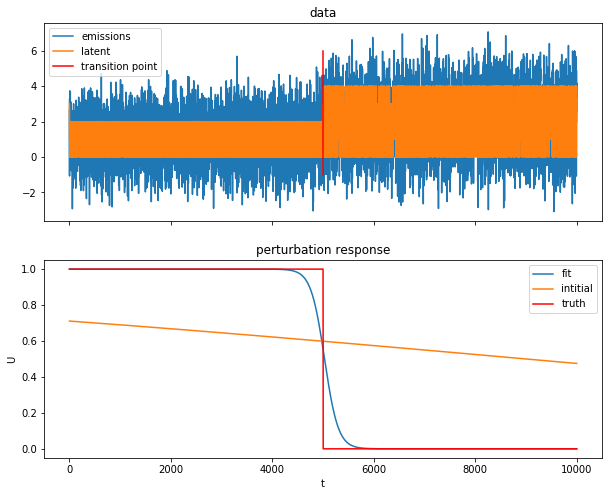

In [21]:
fig, ax = plt.subplots(nrows=2,sharex=True,figsize=(10,8))
ax[0].plot(x, label='emissions')
ax[0].plot(z, label='latent')
ax[0].plot(np.ones(2)*b_true,[-1,6],c='r', label='transition point')
ax[0].legend()
ax[0].set_title('data')

t=np.arange(x.size)
new_hmm.a = a_0
new_hmm.b = b_0
u_0 = new_hmm.U(t)
new_hmm.a = a_fit
new_hmm.b = b_fit

t=np.arange(x.size)
u_fit = new_hmm.U(t)
true_response=np.zeros(t.size)
true_response[:b_true]=1
ax[1].plot(u_fit,label='fit')
ax[1].plot(u_0, label='intitial')
ax[1].plot(true_response, c='red', label='truth')
ax[1].legend()
ax[1].set_title('perturbation response')
ax[1].set_ylabel('U')
ax[1].set_xlabel('t')
fig.savefig('2phaseTest.png')